Hello! Bugün Seoul Bike Sharing Demand datasetini inceleyeceğiz
url = https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
buradan indirdim

# Dataset:

Additional Information

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. 

### Variable Information
* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius 
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


Aşağıdaki kodu okurken hata aldım, chatgpt kodu şu şekilde açıkladı ve çözdü...


Bu hata, pd.read_csv("SeoulBikeData.csv") satırındaki kodun çalıştırıldığı sırada CSV dosyasını okurken bir UnicodeDecodeError aldığınızı gösteriyor. Hata, 'utf-8' kodlamasının belirli bir konumda geçersiz bir başlangıç baytını çözümleyemediğini belirtiyor.

Bu tür bir hata genellikle dosyanın doğru karakter kodlamasıyla açılmamasından kaynaklanır. Öncelikle, dosyanın hangi karakter kodlamasıyla kodlandığını belirlemeniz gerekebilir. Eğer bilmiyorsanız, pd.read_csv fonksiyonuna encoding parametresini ekleyerek deneme yapabilirsiniz.

Örneğin, dosyanız Latin-1 (ISO-8859-1) kodlamasıyla açılabilirse, şu şekilde bir çözüm deneyebilirsiniz:

df = pd.read_csv("SeoulBikeData.csv", encoding='latin-1')


In [7]:
seoul = pd.read_csv("SeoulBikeData.csv", encoding='latin-1')

In [8]:
seoul.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
seoul.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>]], dtype=object)

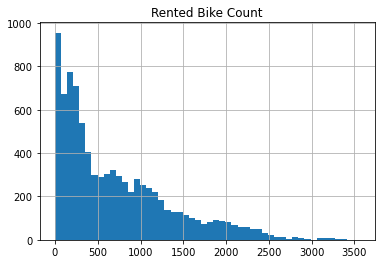

In [14]:
seoul.hist(column="Rented Bike Count", bins=50)